<a href="https://colab.research.google.com/github/vanessaaleung/ds-case-studies/blob/master/%20text-mining%20/%20jeopardy/Text_Mining_America's_Toughest_Game_Show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(readr)
library(dplyr)
library(tm)
library(wordcloud)
jeopardy = read_csv('datasets/jeopardy.csv')

Parsed with column specification:
cols(
  show_number = col_double(),
  air_date = col_character(),
  round = col_character(),
  category = col_character(),
  value = col_character(),
  question = col_character(),
  answer = col_character()
)


In [ ]:
glimpse(jeopardy)
head(jeopardy)

Rows: 116,837
Columns: 7
$ show_number <dbl> 4031, 4031, 4031, 4031, 4031, 4031, 4031, 4031, 4031, 4...
$ air_date    <chr> "2/25/2002", "2/25/2002", "2/25/2002", "2/25/2002", "2/...
$ round       <chr> "Jeopardy!", "Jeopardy!", "Jeopardy!", "Jeopardy!", "Je...
$ category    <chr> "AMERICAN HISTORY", "FIREFIGHTING", "GEOGRAPH\"E\"", "G...
$ value       <chr> "$200", "$200", "$200", "$200", "$200", "$200", "$400",...
$ question    <chr> "In 1805 this territory was created from the Indiana on...
$ answer      <chr> "Michigan", "the Hall of Flame", "Etna", "Gary Burghoff...


show_number,air_date,round,category,value,question,answer
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4031,2/25/2002,Jeopardy!,AMERICAN HISTORY,$200,"In 1805 this territory was created from the Indiana one, with all or parts of the lower & upper peninsulas",Michigan
4031,2/25/2002,Jeopardy!,FIREFIGHTING,$200,"The firefighting museum in Phoenix, Arizona isn't called the Hall of Fame, but the hall of this",the Hall of Flame
4031,2/25/2002,Jeopardy!,"GEOGRAPH""E""",$200,Sicilians call this active volcano Mongibello,Etna
4031,2/25/2002,Jeopardy!,GIVE THE ROLE TO GARY,$200,"TV, 1972-1979: Walter ""Radar"" O'Reilly",Gary Burghoff
4031,2/25/2002,Jeopardy!,WED TO THE IDEA,$200,"The sacrament of marriage, it's ""holy""",matrimony
4031,2/25/2002,Jeopardy!,CRIMINAL CONVERSATION,$200,"Ice can refer to diamonds; chill can mean to do this, maybe with a lawnmower (a machine gun)",to kill


## 1. Data Cleaning

In [ ]:
# take the categories data and convert it to a corpus
categories = jeopardy %>% 
                filter(round=='Jeopardy!') %>%
                select(category)
categories_source = VectorSource(categories)
categories_corp = VCorpus(categories_source)

In [ ]:
# clean the category column
clean_corp <- tm_map(categories_corp, content_transformer(tolower))
clean_corp <- tm_map(clean_corp, removePunctuation)
clean_corp <- tm_map(clean_corp, stripWhitespace)
clean_corp <- tm_map(clean_corp, removeWords, stopwords("english"))
clean_corp = tm_map(clean_corp, removeWords, (c('time', 'new', 'first', 'lets')))

<<TermDocumentMatrix (terms: 6603, documents: 1)>>
Non-/sparse entries: 6603/0
Sparsity           : 0%
Maximal term length: 16
Weighting          : term frequency (tf)

## 2. Favorite topics in the Jeopardy! round
Jeopardy!</em> categories are notorious for being witty and unique. An example of a category title is \"Element, Spel-ement\" (from the episode aired on March 28, 2011). Every question in this category gave the contestant a list of chemical element names, and the contestant had to spell the word created by the symbols of those elements (example: boron, aluminum, potassium = \"balk\").

<p>Some categories have more straightforward titles, such as the \"Indonesia\" category (from the episode on March 25, 2011), which had questions all about Indonesia.</p>

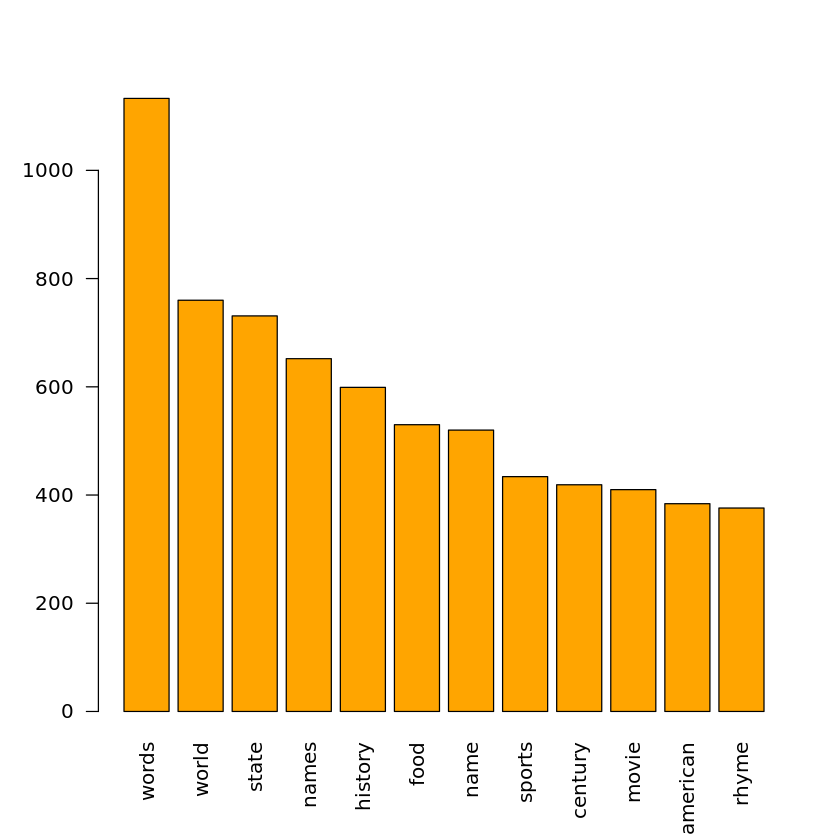

In [ ]:
cleaner_tdm = TermDocumentMatrix(clean_corp)
categories_m = as.matrix(cleaner_tdm)
term_frequency = sort(rowSums(cleaner_tm), decreasing=TRUE)
barplot(head(cleaner_term_frequency, 12), las=2, col="orange")

A few of the top ranking category words are: "words," "world," "state," "name," and "history."

"Words" most likely refers to the wordplay or vocabulary categories, which appear often on the show. The other four words suggest that a Jeopardy! champion will need to know a lot about history, geography, and significant historical figures. However, when we go further down the plot, there's an interesting term—the 11th most common term is "American." Considering this is an American game show, it would make sense that the game requires the contestants to be most familiar with American history.

## 3. Look at the answers to the Final Jeopardy round
<p><strong>Final Jeopardy</strong> is arguably the most important round in the entire game&mdash;contestants bet any amount from their accumulated earnings on one answer. This answer is supposedly more difficult than all the questions in the previous rounds. The contestants make their bets before the answer is read and are given 30 seconds to write down their questions. You can probably imagine how much of a game-changer this round is (check out <a href="https://www.youtube.com/watch?v=SN2hQZWwOCU">this</a> for proof). </p>

In [ ]:
speed_clean <- function(corpus) {
    clean_corp <- tm_map(corpus, content_transformer(tolower))
    clean_corp <- tm_map(clean_corp, removePunctuation)
    clean_corp <- tm_map(clean_corp, stripWhitespace)
    clean_corp <- tm_map(clean_corp, removeWords, stopwords("english"))
    clean_corp <- tm_map(clean_corp, removeWords, (c('time', 'new', 'first', 'lets')))
    return(clean_corp)
}

In [ ]:
freq_terms <- function(corpus) {
    clean_corp <- speed_clean(corpus)
    clean_tdm = TermDocumentMatrix(clean_corp)
    clean_tm = as.matrix(clean_tdm)
    clean_term_frequency = sort(rowSums(clean_tm), decreasing=TRUE)
    return(clean_term_frequency)
}

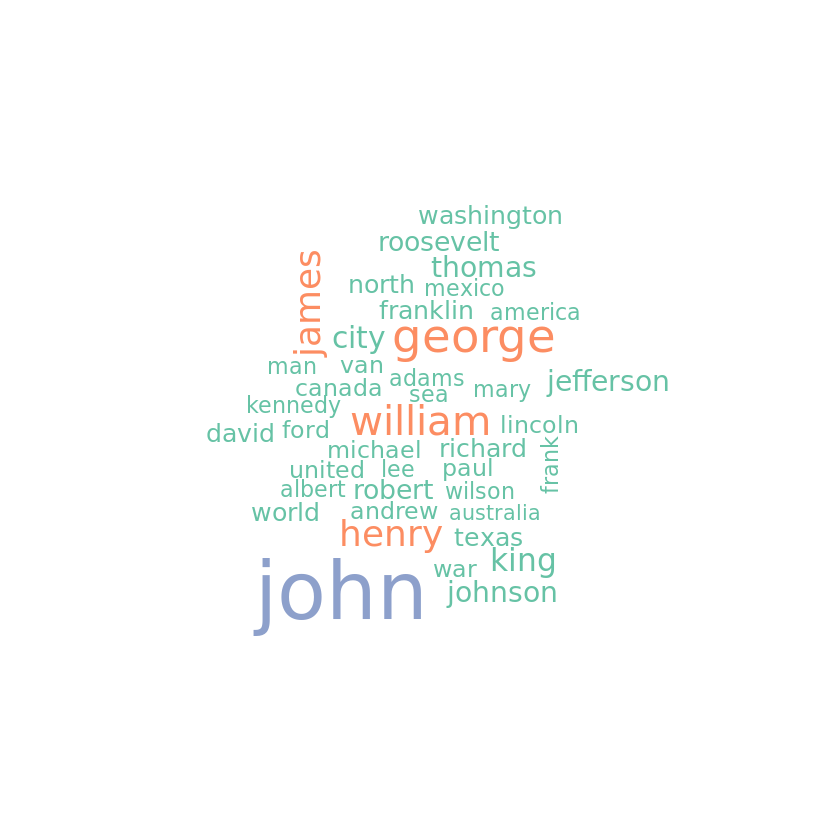

In [ ]:
answers <- jeopardy %>%
               filter(round=='Final Jeopardy!') %>%
               select(answer)

answers_source = VectorSource(answers)
answers_corp = VCorpus(answers_source)

ans_frequency <- freq_terms(answers_corp)
ans_names = names(ans_frequency)
wordcloud(ans_names, ans_frequency, max.words=40, colors=brewer.pal(3, "Set2"))

<p>John, William, James, and Henry… who might these people be? We don't know exactly, but the wordcloud seems to support and expand upon a hunch we had a little while ago - many <em>Jeopardy!</em> questions are drawn from American or European history. While it is certainly possible to get a category like "Indonesia," contestants are much more likely to be tested on the history, literature, or pop culture from the west.</p>